In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing

In [2]:
dataset = fetch_california_housing()

In [3]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
df = pd.DataFrame(data= dataset.data, columns=dataset.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
df['Price'] = dataset.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7533d5f670>,
      dtype=object)

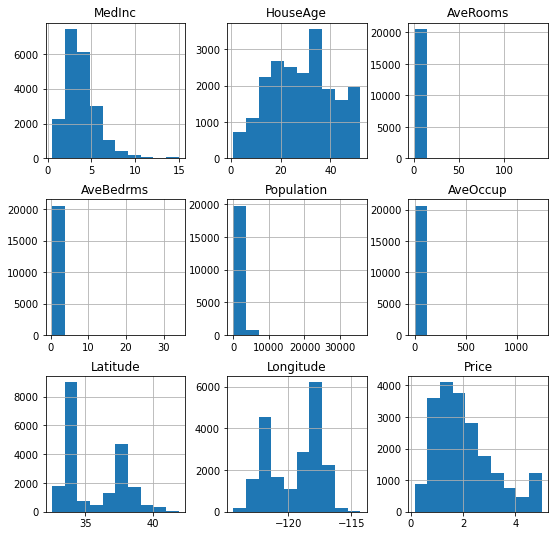

In [6]:
df.hist(figsize = ([9,9]))

In [7]:
df.drop(labels=['Latitude','Longitude', 'Price'],axis=1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467
...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209


In [8]:
from sklearn.ensemble import RandomForestRegressor
training_model= RandomForestRegressor()

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(df, df['Price'],test_size=0.2, random_state=40)

In [12]:
training_model.fit(x_train,y_train)

RandomForestRegressor()

In [13]:
y_predicted = training_model.predict(x_test)

In [15]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predicted)*100

99.99995037764097